# Espaço de estados - Parte 2

[Slides da aula](https://marofe.github.io/controle-digital/2024/aula9.html)

### Questão 1

Nessa atividade, o objetivo --- explorar os recursos computacionais do Matlab para avaliar
controlabilidade e observabilidade de modelos em espaço de estados em tempo discreto.
Para isso, considere o modelo em espaço de estados a seguir
$$
x_{k+1} =
\begin{bmatrix}
3 & -1 \\
0 & 2
\end{bmatrix}
x_k +
\begin{bmatrix}
1 \\
2
\end{bmatrix}
u_k
$$
$$
y_k =
\begin{bmatrix}
0 & 1
\end{bmatrix}
x_k
$$

O código Matlab a seguir avalia o rank da matriz de controlabilidade e observabilidade do sistema.

```matlab
close all
clear all
clc
%%
A = [3 -1; 0 2];
B = [1; 2];
H = [0 1];
%% controlabilidade
C = ctrb(A, B);
disp(['rank(C)=' num2str(rank(C))])
if rank(C) == size(A, 1)
    disp('Sistema controlavel')
else
    disp('Sistema parcialmente controlavel')
end
%% observabilidade
O = obsv(A, H);
disp(['rank(O)=' num2str(rank(O))])
if rank(O) == size(A, 1)
    disp('Sistema observavel')
else
    disp('Sistema parcialmente observavel')
end



Usando a mesma lógica, avalie a controlabilidade e observabilidade do sistema:

$$
x_{k+1} =
\begin{bmatrix}
3 & 0 & 0 \\
5 & 4 & 0 \\
1 & 2 & 3
\end{bmatrix}
x_k +
\begin{bmatrix}
0 \\
2 \\
5
\end{bmatrix}
u_k
$$

$$
y_k =
\begin{bmatrix}
0 & 1 & 0
\end{bmatrix}
x_k
$$

Caso seja não controlável, proponha uma modificação estrutural no sistema para torná-lo controlável. Da mesma forma, caso seja não-observável, proponha uma modificação estrutural do sistema para torná-lo observável.


In [66]:
import numpy as np
from scipy.linalg import eigvals
import matplotlib.pyplot as plt

# Definição das matrizes para o sistema
A = np.array([[3, -1], [0, 2]])
B = np.array([[1], [2]])
H = np.array([[0, 1]])

# Matriz de controlabilidade
n = A.shape[0]
controlabilidade_matrix = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])

# Matriz de observabilidade
observabilidade_matrix = np.vstack([H @ np.linalg.matrix_power(A, i) for i in range(n)])

# Avaliação dos ranks para determinar controlabilidade e observabilidade
rank_controlabilidade = np.linalg.matrix_rank(controlabilidade_matrix)
rank_observabilidade = np.linalg.matrix_rank(observabilidade_matrix)


In [67]:
# Impressão dos resultados
print("Matriz de Controlabilidade (C):\n", controlabilidade_matrix)
print("Rank da Matriz de Controlabilidade:", rank_controlabilidade)
if rank_controlabilidade == n:
    print("O sistema é completamente controlável.")
else:
    print("O sistema é parcialmente controlável.")

print("\nMatriz de Observabilidade (O):\n", observabilidade_matrix)
print("Rank da Matriz de Observabilidade:", rank_observabilidade)
if rank_observabilidade == n:
    print("O sistema é completamente observável.")
else:
    print("O sistema é parcialmente observável.")


Matriz de Controlabilidade (C):
 [[1 1]
 [2 4]]
Rank da Matriz de Controlabilidade: 2
O sistema é completamente controlável.

Matriz de Observabilidade (O):
 [[0 1]
 [0 2]]
Rank da Matriz de Observabilidade: 1
O sistema é parcialmente observável.


In [68]:
# Nova definição de H para tornar o sistema completamente observável
H = np.array([[1, 1]])

# Matriz de observabilidade com a nova H
observabilidade_matrix = np.vstack([H @ np.linalg.matrix_power(A, i) for i in range(n)])

# Avaliação do rank da nova matriz de observabilidade
rank_observabilidade = np.linalg.matrix_rank(observabilidade_matrix)

# Impressão dos resultados
print("\nNova Matriz de Observabilidade (O):\n", observabilidade_matrix)
print("Rank da Nova Matriz de Observabilidade:", rank_observabilidade)
if rank_observabilidade == n:
    print("Com a modificação, o sistema é completamente observável.")
else:
    print("O sistema ainda é parcialmente observável.")



Nova Matriz de Observabilidade (O):
 [[1 1]
 [3 1]]
Rank da Nova Matriz de Observabilidade: 2
Com a modificação, o sistema é completamente observável.


### Questão 2

Nessa atividade, o objetivo é explorar os recursos computacionais do Matlab para projetar controladores por realimentação de estados em tempo discreto.  
Para isso, considere o seguinte sistema como exemplo:

$$
x_{k+1} =
\begin{bmatrix}
1 & -2 \\  
2 & 1  
\end{bmatrix}  
x_k +
\begin{bmatrix}
1 \\  
1  
\end{bmatrix}  
u_k  
$$

Suponha uma lei de controle na forma de realimentação de estados:

$$
u_k = -Kx_k  
$$

Deseja-se que o sistema em malha fechada tenha os polos em posições especificadas. Ou seja, o polinômio característico do sistema em malha-fechada deve satisfazer  

$$
\text{det}(zI - (A - BK)) = (z - p_1)(z - p_2)\cdots(z - p_n)  
$$  

em que \($p_1$, $p_2$, $\dots$, $p_n$\) são os polos desejados em malha fechada.  
Se o sistema for completamente controlável, então existe um ganho \(K\) que faz com que os polos em malha fechada fiquem nas posições desejadas!  
Para sistemas SISO, pode-se usar a equação de Ackermann para obter o ganho de realimentação:

$$
K = \begin{bmatrix} 0 \cdots 1 \end{bmatrix} C^{-1}\gamma(A),
$$

em que \($\gamma(A)$\) é a equação característica desejada em malha fechada avaliada na própria matriz de dinâmica.  
No Matlab, pode-se utilizar o comando `acker`. Já para sistemas MIMO, sem polos com multiplicidade, pode-se usar o comando `place`.  
O código Matlab a seguir obtém o ganho de realimentação de estados para alocar os polos do sistema em \($p_1 = 0.8$\) e \($p_2 = 0.9$\) usando a equação de Ackermann, o comando `acker` e o comando `place`.

```matlab
1 close all
2 clear all
3 clc
4 %%
5 Ad=[1 −2;2 1];
6 Bd=[1;1];
7 rank(ctrb(Ad,Bd))
8 beta=poly([0.8 0.9]) %coef. da eq. caracteristica
9 %% Eq. Ackermann (SISO)
10 K=[0 1]*inv(ctrb(Ad,Bd))*polyvalm(beta,Ad)
11 %% Comando do matlab acker
12 K=acker(Ad,Bd,[0.8 0.9])
13 %% Comando do matlab place (MIMO)
14 K=place(Ad,Bd,[0.8 0.9])
15 %% verifica autovalores da dinamica em malha fechada
16 eig(Ad−Bd*K)
```

Usando a mesma lógica, obtenha o ganho de realimentacão de estados que aloca os polos de malha fechada em \($p_1 = 0.5$\), \($p_2 = 0.8$\), \($p_3 = 0.7$\) para o sistema a seguir:

$$
x_{k+1} =
\begin{bmatrix}
0.75 & -0.25 & 4 \\  
2.25 & -0.75 & 0 \\  
-0.375 & 0.125 & 3.5  
\end{bmatrix}  
x_k +
\begin{bmatrix}
0 \\  
0 \\  
1  
\end{bmatrix}  
u_k  
$$


In [69]:
# Definir matrizes do sistema
A = np.array([[0.75, -0.25, 4],
              [2.25, -0.75, 0],
              [-0.375, 0.125, 3.5]])

B = np.array([[0], [0], [1]])

# Verificar controlabilidade
n = A.shape[0]
controlabilidade_matrix = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
rank_controlabilidade = np.linalg.matrix_rank(controlabilidade_matrix)

# Definir os pólos desejados
poles_desejados = [0.5, 0.8, 0.7]

# Coeficientes do polinômio característico desejado
beta = np.poly(poles_desejados)  # Calcula os coeficientes de (z - p1)(z - p2)(z - p3)

# Avaliar o polinômio matricial gamma(A) usando os coeficientes de beta
gamma_A = sum(beta[i] * np.linalg.matrix_power(A, len(beta) - i - 1) for i in range(len(beta)))

# Calcular o ganho K usando a equação de Ackermann
K = (np.array([0, 0, 1]) @ np.linalg.inv(controlabilidade_matrix) @ gamma_A).reshape(1, -1)

# Impressão dos resultados
print("Rank da Matriz de Controlabilidade:", rank_controlabilidade)
if rank_controlabilidade == n:
    print("O sistema é completamente controlável.")
else:
    print("O sistema é parcialmente controlável.")

print("\nGanho de Realimentação K calculado:")
print("K =", K.flatten())

# Verificar autovalores da matriz dinâmica em malha fechada
A_cl = A - B @ K  # Produto B @ K é de dimensão 3x3
autovalores_malha_fechada = eigvals(A_cl)

print("\nAutovalores do Sistema em Malha Fechada:", autovalores_malha_fechada)

Rank da Matriz de Controlabilidade: 3
O sistema é completamente controlável.

Ganho de Realimentação K calculado:
K = [-0.0475     -0.01527778  1.5       ]

Autovalores do Sistema em Malha Fechada: [0.5+0.j 0.7+0.j 0.8+0.j]


### Questão 3

Nessa atividade, o objetivo é explorar os recursos computacionais do Matlab para obter e simular observadores de estados em tempo discreto.  
Considere o sistema dado por  

$$
x_{k+1} =  
\begin{bmatrix}  
0.7143 & 0.3571 \\  
-1.0714 & -0.3571  
\end{bmatrix}  
x_k +  
\begin{bmatrix}  
1 \\  
1  
\end{bmatrix}  
u_k  
$$  

$$
y_k = \begin{bmatrix} 1 & 0 \end{bmatrix} x_k  
$$  

Uma estratégia para obter o ganho de realimentação para um observador de estados é tratar o problema de observação como dual ao problema de controle!  
Assim, pode-se usar o mesmo processo de cálculo do ganho de realimentação de estados para calcular o ganho do observador.  
Para isso, adota-se o modelo dual do sistema fazendo as seguintes equivalências:  

1. $A_d \rightarrow A_d^\top$
2. $B_d \rightarrow H^\top$

O seguinte código em Matlab obtém um observador de estados para esse sistema e faz a simulação com uma entrada senoidal.  

```matlab
1 close all
2 clear all
3 clc
4 %%
5 Ad=[0.7143 0.3571;...
6 −1.0714 −0.3571];
7 Bd=[1;1];
8 H=[1 0];
9 rank(obsv(Ad,H))
10 L=place(Ad',H',[0.5 0.6])'
11 eig(Ad−L*H)
12 %%
13 N=100;
14 x=zeros(2,N);
15 hx=zeros(2,N);
16 y=zeros(1,N);
17 u=zeros(1,N);
18 %% cond. inicial real
19 x(:,1)=[10 10]';
20 %% cond. inicial do observador
21 hx(:,1)=[20 −20]';
22 for k=1:N
23 %% sistema real
24 u(k)=sin(k);
25 x(:,k+1)=Ad*x(:,k)+Bd*u(k);
26 y(k)=H*x(:,k);
27 %% observador
28 hx(:,k+1)=Ad*hx(:,k)+Bd*u(k)+L*(y(k)−H*hx(:,k));
29 end
30 %%
31 figure
32 subplot(2,1,1)
33 stairs(x(1,:),'LineWidth',1.5)
34 hold on
35 stairs(hx(1,:),'−','LineWidth',1)
36 xlim([0 50])
37 grid on
38 legend('x 1','hx 1')
39 subplot(2,1,2)
40 stairs(x(2,:),'LineWidth',1.5)
41 hold on
42 stairs(hx(2,:),'−','LineWidth',1)
43 xlim([0 50])
44 grid on
45 legend('x 2','hx 2')
46 suptitle('Observador de Estados')
```

Seguindo a mesma lógica, obtenha um observador de estados e simule o sistema a seguir com entrada senoidal. Considere \($x_0 = [10, 15, -5]^\top$\) e \($\hat{x}_0 = [0, 0, 0]^\top$\). Escolha os polos do observador em malha fechada de forma que ele seja mais rápido que o sistema original.  

$$
x_{k+1} =  
\begin{bmatrix}  
-0.5 & 0.25 & 0 \\  
0 & -0.25 & 0 \\  
0 & 0 & -0.75  
\end{bmatrix}  
x_k +  
\begin{bmatrix}  
1 \\  
1 \\  
1  
\end{bmatrix}  
u_k  
$$  

$$
y_k = \begin{bmatrix} 1 & 0 & 1 \end{bmatrix} x_k  
$$


In [70]:
from scipy.signal import place_poles

# Definindo as matrizes do sistema
A = np.array([[-0.5, 0.25, 0],
              [0, -0.25, 0],
              [0, 0, -0.75]])

B = np.array([[1], [1], [1]])
H = np.array([[1, 0, 1]])

# Verificando observabilidade
n = A.shape[0]
observabilidade_matrix = np.vstack([H @ np.linalg.matrix_power(A, i) for i in range(n)])
rank_observabilidade = np.linalg.matrix_rank(observabilidade_matrix)

# Definindo os polos do observador para garantir que seja mais rápido que o sistema
# Calculamos os autovalores de A para ter uma referência de rapidez
autovalores_sistema = eigvals(A)
# Polos do observador com valores menores para garantir estabilidade
polos_observador = [-0.2, -0.3, -0.4]


# Calculando o ganho L para o observador usando alocação de polos
place_result = place_poles(A.T, H.T, polos_observador)
L = place_result.gain_matrix.T

# Parâmetros da simulação
N = 100  # número de passos de simulação
x = np.zeros((3, N))  # estado real
hx = np.zeros((3, N))  # estado estimado (observador)
y = np.zeros(N)  # saída
u = np.zeros(N)  # entrada aplicada

# Condições iniciais
x[:, 0] = [10, 15, -5]  # estado inicial real
hx[:, 0] = [0, 0, 0]    # estado inicial do observador

# Simulação do sistema e do observador
for k in range(N - 1):
    # Entrada como uma função senoidal
    u[k] = np.sin(k)

    # Sistema real
    x[:, k + 1] = A @ x[:, k] + B.flatten() * u[k]
    y[k] = H @ x[:, k]

    # Observador de estados
    hx[:, k + 1] = A @ hx[:, k] + B.flatten() * u[k] + L @ (y[k] - H @ hx[:, k])

# Último valor de y para completar a simulação
y[-1] = H @ x[:, -1]


Matriz de Observabilidade (O):
 [[ 1.      0.      1.    ]
 [-0.5     0.25   -0.75  ]
 [ 0.25   -0.1875  0.5625]]
Rank da Matriz de Observabilidade: 3
O sistema é completamente observável.

Ganho de Observador L calculado:
L =
 [[ 0.093]
 [-0.003]
 [-0.693]]

Autovalores do Sistema: [-0.5 +0.j -0.25+0.j -0.75+0.j]
Polos do Observador: [-0.2, -0.3, -0.4]


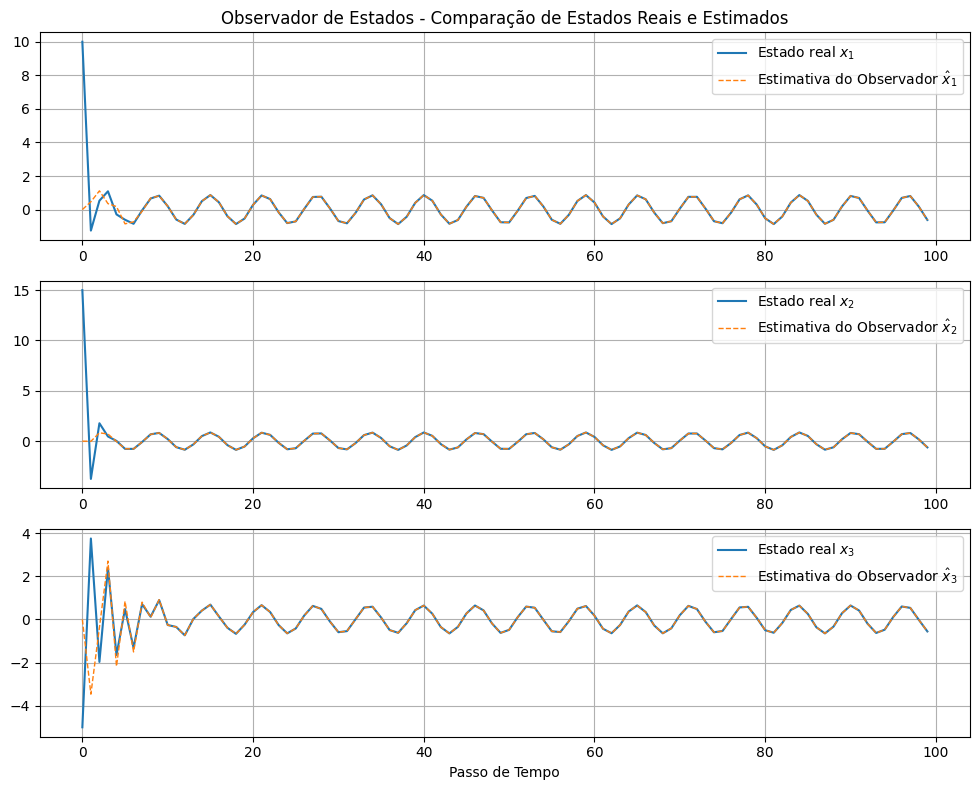

In [71]:
# Impressão dos resultados de observabilidade e ganho L
print("Matriz de Observabilidade (O):\n", observabilidade_matrix)
print("Rank da Matriz de Observabilidade:", rank_observabilidade)
if rank_observabilidade == n:
    print("O sistema é completamente observável.")
else:
    print("O sistema é parcialmente observável.")

print("\nGanho de Observador L calculado:")
print("L =\n", L)

print("\nAutovalores do Sistema:", autovalores_sistema)
print("Polos do Observador:", polos_observador)

# Plots dos estados reais e estimados pelo observador
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(range(N), x[0, :], label="Estado real $x_1$", linewidth=1.5)
plt.plot(range(N), hx[0, :], '--', label="Estimativa do Observador $\hat{x}_1$", linewidth=1)
plt.grid(True)
plt.legend()
plt.title("Observador de Estados - Comparação de Estados Reais e Estimados")

plt.subplot(3, 1, 2)
plt.plot(range(N), x[1, :], label="Estado real $x_2$", linewidth=1.5)
plt.plot(range(N), hx[1, :], '--', label="Estimativa do Observador $\hat{x}_2$", linewidth=1)
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(range(N), x[2, :], label="Estado real $x_3$", linewidth=1.5)
plt.plot(range(N), hx[2, :], '--', label="Estimativa do Observador $\hat{x}_3$", linewidth=1)
plt.grid(True)
plt.legend()

plt.xlabel("Passo de Tempo")
plt.tight_layout()
plt.show()


### Questão 4

Nessa atividade, o objetivo é projetar um controlador de realimentação de estados usando um observador de estados.  
Nesse exemplo, será utilizado o modelo do *self-balanced robot* conforme ilustrado na Figura 1. As EDO que descrevem o comportamento dessa planta são dadas a seguir:  

Figura 1: Self-balanced robot.  

$$
(M + m)\ddot{x} - ml \cos(\theta) \ddot{\theta} + ml \dot{\theta}^2 \sin(\theta) + \alpha_1 \dot{x} = u, \tag{3}
$$  

$$
\frac{l}{2}m \ddot{\theta} - ml \cos(\theta) \ddot{x} - gml \sin(\theta) + \alpha_2 \dot{\theta} = 0. \tag{4}
$$  

O vetor de estados é dado por  

$$
x =  
\begin{bmatrix}  
x \\  
\dot{x} \\  
\theta \\  
\dot{\theta}  
\end{bmatrix},  
$$  

onde:

- $ x $ → posição  
- $ \dot{x} $ → velocidade  
- $ \theta $ → posição angular  
- $ \dot{\theta} $ → velocidade angular  

e o sinal de entrada é o torque que atua na roda. Suponha que estejam disponíveis medições da posição $ x $ e da posição angular $ \theta $. Assim, a equação de saída desse sistema é dada por  

$$
y = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \end{bmatrix} x  
$$  

Adotando,  

$$
x_0 =  
\begin{bmatrix}  
0 \\  
0 \\  
0 \\  
0  
\end{bmatrix}, \quad u_0 = 0,
$$  

como ponto de operação do sistema (posição vertical com velocidade zero), pode-se obter um modelo linearizado na forma  

$$
\dot{x} = A(x_0, u_0)x + B(x_0, u_0)u,
$$  

válido para regiões próximas do ponto $(x_0, u_0)$. Após obter o modelo linearizado, pode-se utilizar o comando `c2d` para obter o equivalente em tempo discreto.  
O código Matlab a seguir obtém as matrizes $ A(x_0, u_0) $ e $ B(x_0, u_0) $ do modelo linearizado para esse sistema e as respectivas matrizes em tempo discreto para $ T_s = 0.1s $.  

```matlab
1 close all
2 clear all
3 clc
4 %%
5 syms m M l u g alpha1 alpha2
6 syms th th d th dd
7 syms x x d x dd
8
9 eq1=(M+m)*x dd−m*l*th dd*cos(th)+m*l*th dˆ2*sin(th)+alpha1*x d−u;
10 eq2=lˆ2*m*th dd−x dd*m*l*cos(th)−g*m*l*sin(th)+alpha2*th d;
11 S=solve(eq1==0, eq2==0, x dd, th dd)
12 %%
13 x vet=[x;x d;th;th d];
14 x vet dot=[x d; S.x dd; th d; S.th dd];
15
16 A=simplify(jacobian(x vet dot,x vet))
17 B=simplify(jacobian(x vet dot,u))
18
19 %% ponto de operacao
20 x=0;
21 x d=0;
22 th=0;
23 th d=0;
24 u=0;
25 %%
26 A0=simplify(subs(A)) %matriz dinamica
27 B0=simplify(subs(B)) %matriz de entrada
28 %%
29 M=1.5;
30 m=0.5;
31 l=1;
32 g=9.81;
33 alpha1=0.01;
34 alpha2=0.01;
35 A0=double(simplify(subs(A))) %matriz dinamica
36 B0=double(simplify(subs(B))) %matriz de entrada
37 %%
38 Ts=0.1; %tempo de amostragem
39 [Ad,Bd]=c2d(A0,B0,Ts)
```

Considere a condição inicial do sistema real como $ x_0 = \left[ 2, 0, \frac{10 \pi}{180}, 0 \right]^\top $.  

1. Avalie a controlabilidade e a observabilidade do sistema. Ele é completamente controlável e observável no ponto de operação escolhido?  

2. Projete um controle de realimentação de estados de forma a trazer o sistema para a origem $(x_k = [0 \ 0 \ 0 \ 0]^\top)$ em menos de 5s. Assuma que os estados são acessíveis diretamente (não há necessidade de um observador).  

3. Considere agora que apenas medições de posição $ x $ e de posição angular $ \theta $ estão disponíveis e, então, utilize um observador de estados para fazer o controle do item anterior.  

4. Ao final, apresente um comparativo dos estados verdadeiros do sistema e dos estados estimados pelo observador e também um comparativo do controle com acesso direto aos estados e do controle usando os estados do observador. Comente com suas palavras as diferenças que são percebidas ao utilizar o observador de estado para fazer o controle.  

Dica: Use o código de exemplo disponível no e-disciplina (arquivo *self-balanced-robot.zip*) como ponto de partida (script *controle-self-balanced-robot2.m*). Defina os polos de malha fechada tanto para o sistema quanto para o observador de estados. Lembre-se que os polos do observador precisam ser mais rápidos que os polos do sistema em malha fechada. Para obter os ganhos de realimentação, pode-se utilizar o comando `place`.  


In [72]:
import sympy as sp

# Definir variáveis simbólicas
M, m, l, g, alpha1, alpha2 = sp.symbols('M m l g alpha1 alpha2')
x, x_dot, theta, theta_dot = sp.symbols('x x_dot theta theta_dot')
x_ddot, theta_ddot = sp.symbols('x_ddot theta_ddot')
u = sp.symbols('u')

# Equações de movimento do sistema (modelo não linear)
eq1 = (M + m) * x_ddot - m * l * sp.cos(theta) * theta_ddot + m * l * theta_dot**2 * sp.sin(theta) + alpha1 * x_dot - u
eq2 = l**2 * m * theta_ddot - m * l * sp.cos(theta) * x_ddot - g * m * l * sp.sin(theta) + alpha2 * theta_dot

# Resolver as equações para x_ddot e theta_ddot
sol = sp.solve([eq1, eq2], (x_ddot, theta_ddot))
x_ddot_expr = sol[x_ddot]
theta_ddot_expr = sol[theta_ddot]

# Vetor de estados e suas derivadas
x_vec = sp.Matrix([x, x_dot, theta, theta_dot])
x_vec_dot = sp.Matrix([x_dot, x_ddot_expr, theta_dot, theta_ddot_expr])

# Derivar as matrizes A e B
A = x_vec_dot.jacobian(x_vec)
B = x_vec_dot.jacobian([u])

# Substituir o ponto de operação
A_lin = A.subs({x: 0, x_dot: 0, theta: 0, theta_dot: 0, u: 0})
B_lin = B.subs({x: 0, x_dot: 0, theta: 0, theta_dot: 0, u: 0})


In [73]:
# Impressão das Matrizes Linearizadas
print("Matriz A (linearizada no ponto de operação):")
sp.pprint(A_lin)

print("\nMatriz B (linearizada no ponto de operação):")
sp.pprint(B_lin)

Matriz A (linearizada no ponto de operação):
⎡0   1       0           0      ⎤
⎢                               ⎥
⎢   -α₁     g⋅m        -α₂      ⎥
⎢0  ────    ───        ────     ⎥
⎢    M       M         M⋅l      ⎥
⎢                               ⎥
⎢0   0       0           1      ⎥
⎢                               ⎥
⎢   -α₁   g   g⋅m     α₂     α₂ ⎥
⎢0  ────  ─ + ───  - ──── - ────⎥
⎢   M⋅l   l   M⋅l     2        2⎥
⎣                    l ⋅m   M⋅l ⎦

Matriz B (linearizada no ponto de operação):
⎡ 0 ⎤
⎢   ⎥
⎢ 1 ⎥
⎢ ─ ⎥
⎢ M ⎥
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎢ 1 ⎥
⎢───⎥
⎣M⋅l⎦


In [74]:
from scipy.signal import cont2discrete

# Tempo de amostragem
T_s = 0.1

# Substituir valores numéricos para os parâmetros do sistema
params = {M: 1.5, m: 0.5, l: 1.0, g: 9.81, alpha1: 0.01, alpha2: 0.01}
A_num = A_lin.subs(params)
B_num = B_lin.subs(params)

# Converter as matrizes para numpy arrays
A_cont = np.array(A_num).astype(float)
B_cont = np.array(B_num).astype(float)

# Obter o modelo discreto usando cont2discrete
system_discrete = cont2discrete((A_cont, B_cont, np.eye(4), np.zeros((4, 1))), T_s)
A_d = system_discrete[0]
B_d = system_discrete[1]


In [75]:
# Impressão das Matrizes Discretizadas
print("Matriz A_d (discreta):")
print(A_d)

print("\nMatriz B_d (discreta):")
print(B_d)

Matriz A_d (discreta):
[[ 1.00000000e+00  9.99665904e-02  1.65106198e-02  5.14457052e-04]
 [ 0.00000000e+00  9.99330126e-01  3.33619849e-01  1.58304571e-02]
 [ 0.00000000e+00 -3.36607948e-05  1.06605344e+00  1.02058079e-01]
 [ 0.00000000e+00 -6.80162790e-04  1.33480961e+00  1.06333212e+00]]

Matriz B_d (discreta):
[[0.00334096]
 [0.06698736]
 [0.00336608]
 [0.06801628]]


In [76]:
# Definir as matrizes A_d e B_d do sistema discreto (obtidas anteriormente)
A_d = np.array([
    [1.00000000e+00, 9.99665904e-02, 1.65106198e-02, 5.14457052e-04],
    [0.00000000e+00, 9.99330126e-01, 3.33619849e-01, 1.58304571e-02],
    [0.00000000e+00, -3.36607948e-05, 1.06605344e+00, 1.02058079e-01],
    [0.00000000e+00, -6.80162790e-04, 1.33480961e+00, 1.06333212e+00]
])

B_d = np.array([
    [0.00334096],
    [0.06698736],
    [0.00336608],
    [0.06801628]
])

# Definir a matriz de saída H com base no modelo (assumindo que mede posição e ângulo)
H = np.array([[1, 0, 0, 0], [0, 0, 1, 0]])

# Número de estados
n = A_d.shape[0]

# Calcular a matriz de controlabilidade C
controlabilidade_matrix = B_d
for i in range(1, n):
    controlabilidade_matrix = np.hstack((controlabilidade_matrix, np.linalg.matrix_power(A_d, i) @ B_d))

# Calcular a matriz de observabilidade O
observabilidade_matrix = H
for i in range(1, n):
    observabilidade_matrix = np.vstack((observabilidade_matrix, H @ np.linalg.matrix_power(A_d, i)))

# Calcular os ranks das matrizes de controlabilidade e observabilidade
rank_controlabilidade = np.linalg.matrix_rank(controlabilidade_matrix)
rank_observabilidade = np.linalg.matrix_rank(observabilidade_matrix)


In [77]:
# Impressão dos resultados
print("Matriz de Controlabilidade (C):")
print(controlabilidade_matrix)
print("\nRank da Matriz de Controlabilidade:", rank_controlabilidade)
if rank_controlabilidade == n:
    print("O sistema é completamente controlável.")
else:
    print("O sistema é parcialmente controlável.")

print("\nMatriz de Observabilidade (O):")
print(observabilidade_matrix)
print("\nRank da Matriz de Observabilidade:", rank_observabilidade)
if rank_observabilidade == n:
    print("O sistema é completamente observável.")
else:
    print("O sistema é parcialmente observável.")


Matriz de Controlabilidade (C):
[[0.00334096 0.01012803 0.01725325 0.02499696]
 [0.06698736 0.06914221 0.07382349 0.08164551]
 [0.00336608 0.01052778 0.01905599 0.03007296]
 [0.06801628 0.07677141 0.09563906 0.12708198]]

Rank da Matriz de Controlabilidade: 4
O sistema é completamente controlável.

Matriz de Observabilidade (O):
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  9.99665904e-02  1.65106198e-02  5.14457052e-04]
 [ 0.00000000e+00 -3.36607948e-05  1.06605344e+00  1.02058079e-01]
 [ 1.00000000e+00  1.99865310e-01  6.81493638e-02  4.32905472e-03]
 [ 0.00000000e+00 -1.38938560e-04  1.27268681e+00  2.17320467e-01]
 [ 1.00000000e+00  2.99692778e-01  1.61618982e-01  1.52368324e-02]
 [ 0.00000000e+00 -3.29498433e-04  1.64678725e+00  3.60969604e-01]]

Rank da Matriz de Observabilidade: 4
O sistema é completamente observável.


In [78]:
# Matrizes A_d e B_d do sistema discreto, conforme obtidas anteriormente
A_d = np.array([
    [1.00000000e+00, 9.99665904e-02, 1.65106198e-02, 5.14457052e-04],
    [0.00000000e+00, 9.99330126e-01, 3.33619849e-01, 1.58304571e-02],
    [0.00000000e+00, -3.36607948e-05, 1.06605344e+00, 1.02058079e-01],
    [0.00000000e+00, -6.80162790e-04, 1.33480961e+00, 1.06333212e+00]
])

B_d = np.array([
    [0.00334096],
    [0.06698736],
    [0.00336608],
    [0.06801628]
])

# Definir os polos desejados em malha fechada para estabilizar o sistema
polos_desejados = [0.5, 0.6, 0.7, 0.8]

# Calcular o ganho K para o controlador usando alocação de polos
place_result = place_poles(A_d, B_d, polos_desejados)
K = place_result.gain_matrix


In [79]:
# Imprimir o ganho de realimentação de estados K e verificar os polos do sistema em malha fechada
print("Ganho de Realimentação de Estados K calculado:")
print(K)

# Verificar os autovalores do sistema em malha fechada (A_d - B_d @ K)
A_cl = A_d - B_d @ K
autovalores_malha_fechada = np.linalg.eigvals(A_cl)

print("\nAutovalores do Sistema em Malha Fechada:")
print(autovalores_malha_fechada)


Ganho de Realimentação de Estados K calculado:
[[-18.18019573 -20.65078544 122.48166029  37.64559785]]

Autovalores do Sistema em Malha Fechada:
[0.5 0.6 0.7 0.8]


In [80]:
# Matrizes do sistema discreto (obtidas anteriormente)
A_d = np.array([
    [1.00000000e+00, 9.99665904e-02, 1.65106198e-02, 5.14457052e-04],
    [0.00000000e+00, 9.99330126e-01, 3.33619849e-01, 1.58304571e-02],
    [0.00000000e+00, -3.36607948e-05, 1.06605344e+00, 1.02058079e-01],
    [0.00000000e+00, -6.80162790e-04, 1.33480961e+00, 1.06333212e+00]
])

B_d = np.array([
    [0.00334096],
    [0.06698736],
    [0.00336608],
    [0.06801628]
])

# Definir a matriz de saída H (mede posição x e ângulo θ)
H = np.array([[1, 0, 0, 0], [0, 0, 1, 0]])

# Polos desejados para o controlador (conforme item anterior)
polos_controlador = [0.5, 0.6, 0.7, 0.8]
place_result = place_poles(A_d, B_d, polos_controlador)
K = place_result.gain_matrix

# Polos do observador para garantir que ele seja mais rápido que o controlador
polos_observador = [0.3, 0.4, 0.45, 0.5]
place_result_observador = place_poles(A_d.T, H.T, polos_observador)
L = place_result_observador.gain_matrix.T


Ganho de Realimentação de Estados K:
[[-18.18019573 -20.65078544 122.48166029  37.64559785]]

Ganho do Observador L:
[[1.15998096 0.09893372]
 [3.34719756 0.88692028]
 [0.08070809 1.31873473]
 [0.49574247 5.54746897]]


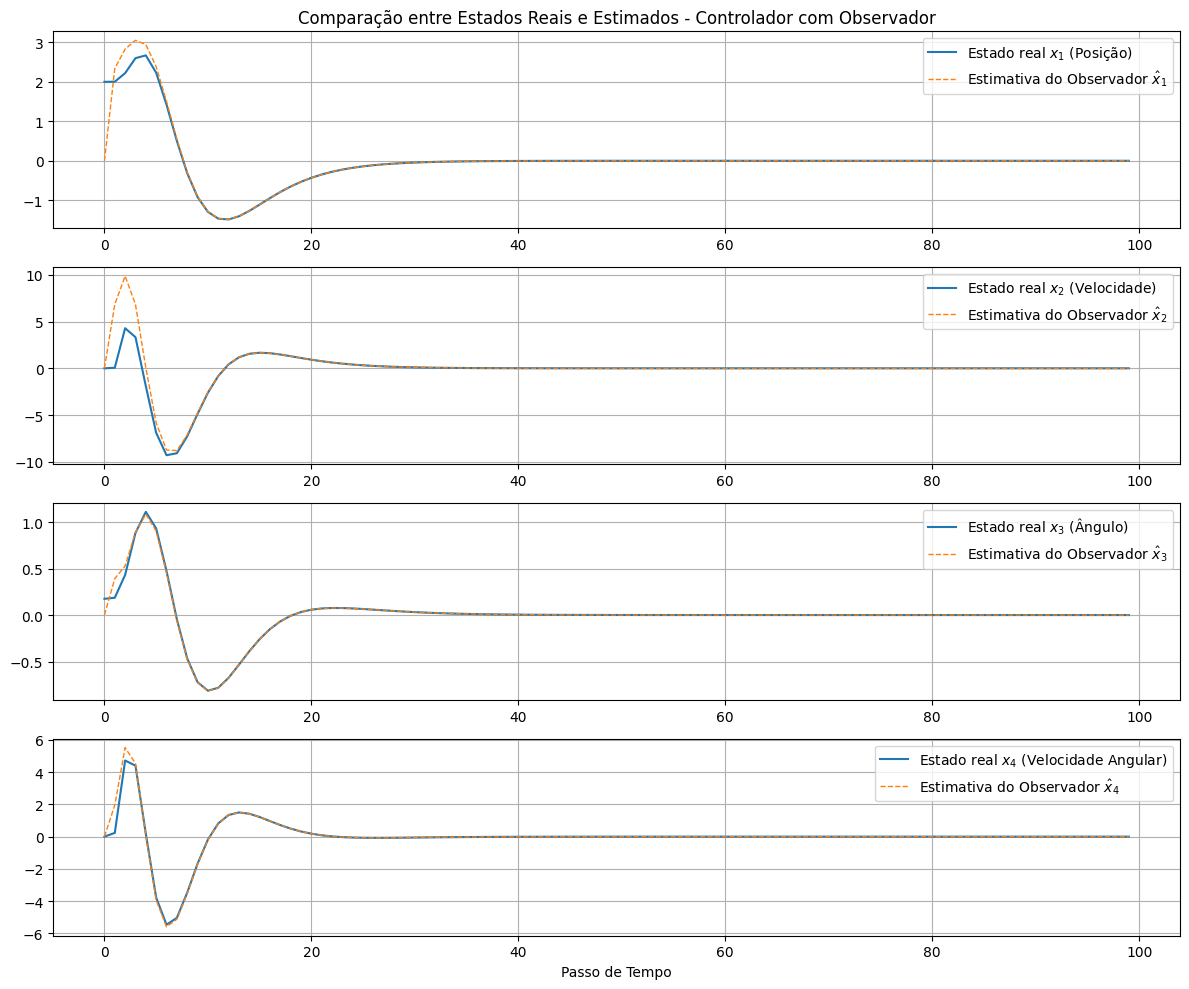

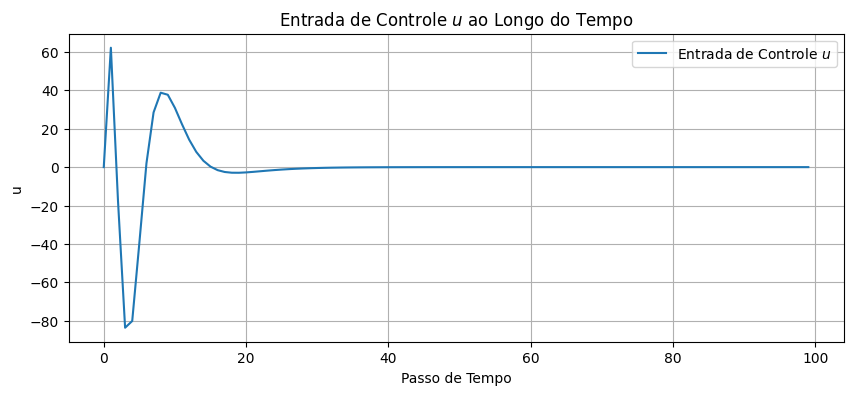

In [81]:
# Imprimir os ganhos de realimentação de estados K e do observador L
print("Ganho de Realimentação de Estados K:")
print(K)

print("\nGanho do Observador L:")
print(L)

# Parâmetros de simulação
N = 100  # número de passos de simulação
x = np.zeros((4, N))  # estados reais do sistema
hx = np.zeros((4, N))  # estados estimados pelo observador
y = np.zeros((2, N))  # saídas medidas (x e θ)
u = np.zeros(N)  # entrada aplicada

# Condições iniciais
x[:, 0] = [2, 0, np.radians(10), 0]  # estado inicial real (10 graus = 10π/180 rad)
hx[:, 0] = [0, 0, 0, 0]  # estado inicial do observador (tudo em zero)

# Simulação do sistema e do observador com realimentação de estados
for k in range(N - 1):
    # Entrada de controle baseada na estimativa do observador
    u[k] = -K @ hx[:, k]

    # Sistema real
    x[:, k + 1] = A_d @ x[:, k] + B_d.flatten() * u[k]
    y[:, k] = H @ x[:, k]

    # Observador de estados
    hx[:, k + 1] = A_d @ hx[:, k] + B_d.flatten() * u[k] + L @ (y[:, k] - H @ hx[:, k])

# Último valor de y para completar a simulação
y[:, -1] = H @ x[:, -1]

# Plotagem dos resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(range(N), x[0, :], label="Estado real $x_1$ (Posição)", linewidth=1.5)
plt.plot(range(N), hx[0, :], '--', label="Estimativa do Observador $\hat{x}_1$", linewidth=1)
plt.grid(True)
plt.legend()
plt.title("Comparação entre Estados Reais e Estimados - Controlador com Observador")

plt.subplot(4, 1, 2)
plt.plot(range(N), x[1, :], label="Estado real $x_2$ (Velocidade)", linewidth=1.5)
plt.plot(range(N), hx[1, :], '--', label="Estimativa do Observador $\hat{x}_2$", linewidth=1)
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(range(N), x[2, :], label="Estado real $x_3$ (Ângulo)", linewidth=1.5)
plt.plot(range(N), hx[2, :], '--', label="Estimativa do Observador $\hat{x}_3$", linewidth=1)
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(range(N), x[3, :], label="Estado real $x_4$ (Velocidade Angular)", linewidth=1.5)
plt.plot(range(N), hx[3, :], '--', label="Estimativa do Observador $\hat{x}_4$", linewidth=1)
plt.grid(True)
plt.legend()
plt.xlabel("Passo de Tempo")

plt.tight_layout()
plt.show()

# Plot da entrada de controle
plt.figure(figsize=(10, 4))
plt.plot(range(N), u, label="Entrada de Controle $u$", linewidth=1.5)
plt.grid(True)
plt.legend()
plt.title("Entrada de Controle $u$ ao Longo do Tempo")
plt.xlabel("Passo de Tempo")
plt.ylabel("u")
plt.show()


In [82]:
# Matrizes do sistema
A_d = np.array([
    [1.00000000e+00, 9.99665904e-02, 1.65106198e-02, 5.14457052e-04],
    [0.00000000e+00, 9.99330126e-01, 3.33619849e-01, 1.58304571e-02],
    [0.00000000e+00, -3.36607948e-05, 1.06605344e+00, 1.02058079e-01],
    [0.00000000e+00, -6.80162790e-04, 1.33480961e+00, 1.06333212e+00]
])

B_d = np.array([
    [0.00334096],
    [0.06698736],
    [0.00336608],
    [0.06801628]
])

H = np.array([[1, 0, 0, 0], [0, 0, 1, 0]])

# Polos desejados e ganhos do controlador e do observador (obtidos anteriormente)
polos_controlador = [0.5, 0.6, 0.7, 0.8]
place_result = place_poles(A_d, B_d, polos_controlador)
K = place_result.gain_matrix

polos_observador = [0.3, 0.4, 0.45, 0.5]
place_result_observador = place_poles(A_d.T, H.T, polos_observador)
L = place_result_observador.gain_matrix.T

# Parâmetros de simulação
N = 100  # número de passos de simulação
x_real = np.zeros((4, N))  # estados reais do sistema
hx = np.zeros((4, N))  # estados estimados pelo observador
y = np.zeros((2, N))  # saídas medidas (x e θ)
u_direto = np.zeros(N)  # controle com acesso direto aos estados
u_observador = np.zeros(N)  # controle usando o observador

# Condições iniciais
x_real[:, 0] = [2, 0, np.radians(10), 0]  # estado inicial real
hx[:, 0] = [0, 0, 0, 0]  # estado inicial do observador (tudo em zero)

# Simulação do sistema
for k in range(N - 1):
    # Controle com acesso direto aos estados reais
    u_direto[k] = -K @ x_real[:, k]

    # Controle com estimativas do observador
    u_observador[k] = -K @ hx[:, k]

    # Dinâmica do sistema real
    x_real[:, k + 1] = A_d @ x_real[:, k] + B_d.flatten() * u_direto[k]
    y[:, k] = H @ x_real[:, k]

    # Observador de estados
    hx[:, k + 1] = A_d @ hx[:, k] + B_d.flatten() * u_observador[k] + L @ (y[:, k] - H @ hx[:, k])

# Último valor de y e controle
y[:, -1] = H @ x_real[:, -1]
u_direto[-1] = -K @ x_real[:, -1]
u_observador[-1] = -K @ hx[:, -1]


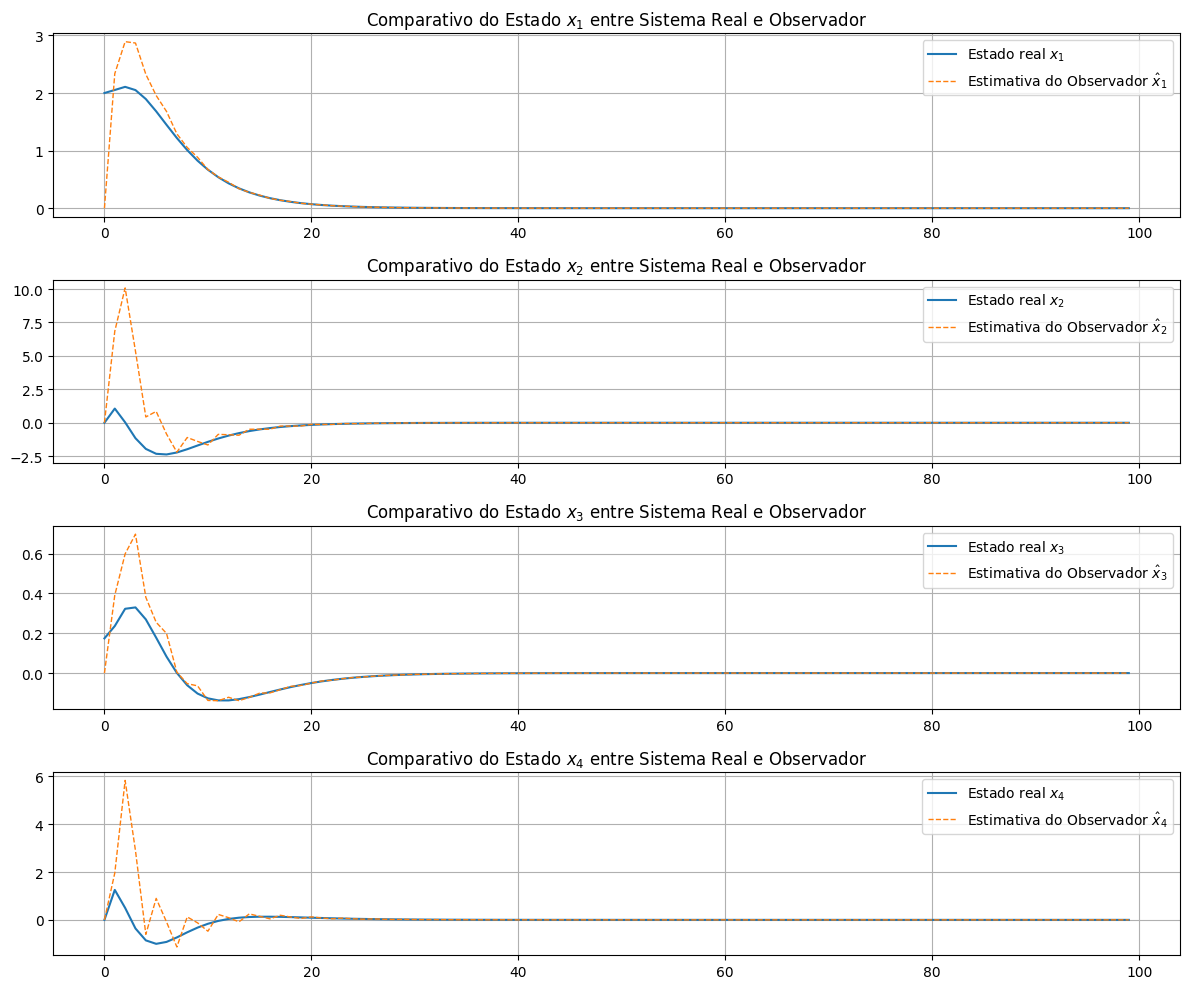

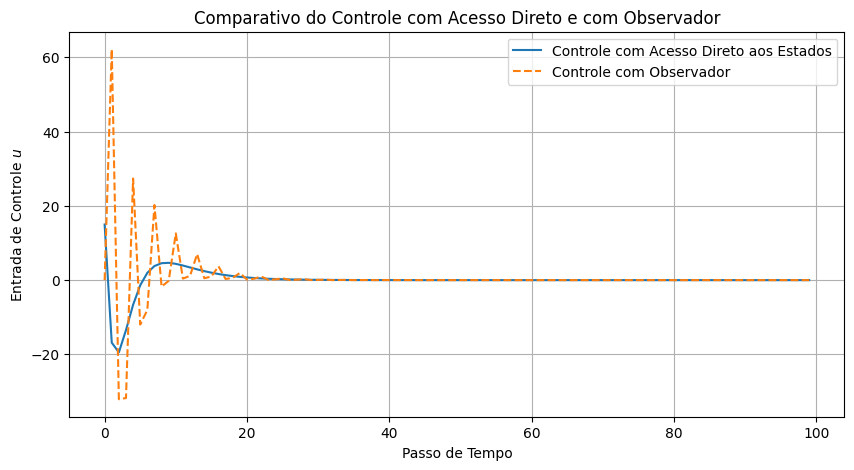

In [83]:
# Comparativo entre Estados Reais e Estados Estimados pelo Observador
plt.figure(figsize=(12, 10))
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.plot(range(N), x_real[i, :], label=f"Estado real $x_{i+1}$", linewidth=1.5)
    plt.plot(range(N), hx[i, :], '--', label=f"Estimativa do Observador $\hat{{x}}_{i+1}$", linewidth=1)
    plt.grid(True)
    plt.legend()
    plt.title(f"Comparativo do Estado $x_{i+1}$ entre Sistema Real e Observador")

plt.tight_layout()
plt.show()

# Comparativo entre Controle com Acesso Direto aos Estados e Controle com Observador
plt.figure(figsize=(10, 5))
plt.plot(range(N), u_direto, label="Controle com Acesso Direto aos Estados", linewidth=1.5)
plt.plot(range(N), u_observador, '--', label="Controle com Observador", linewidth=1.5)
plt.grid(True)
plt.legend()
plt.title("Comparativo do Controle com Acesso Direto e com Observador")
plt.xlabel("Passo de Tempo")
plt.ylabel("Entrada de Controle $u$")
plt.show()


### Questão 5

Nessa atividade, o objetivo é projetar um controlador com rastreamento para modelos em espaço de estados em tempo discreto.  
Nesse exemplo, será utilizado o modelo simplificado de um quadricóptero restrito a movimentos em um plano conforme ilustrado na Figura 2. As EDO que descrevem o comportamento dessa planta são dadas a seguir:  

Figura 2: Quadricóptero.  

$$
\ddot{z} = \frac{1}{M}(F_1 + F_2) \cos(\theta) - g \tag{5}
$$  

$$
\ddot{y} = \frac{1}{M}(F_1 + F_2) \sin(\theta) \tag{6}
$$  

$$
\ddot{\theta} = \frac{l}{I_{xx}}(F_1 - F_2) \tag{7}
$$  

O vetor de estados é dado por  

$$
x =  
\begin{bmatrix}  
z \\  
y \\  
\dot{z} \\  
\dot{y} \\  
\theta \\  
\dot{\theta}  
\end{bmatrix},
$$  

onde:

- $ z $ → posição na direção $ z $  
- $ y $ → posição na direção $ y $  
- $ \dot{z} $ → velocidade na direção $ z $  
- $ \dot{y} $ → velocidade na direção $ y $  
- $ \theta $ → posição angular (roll)  
- $ \dot{\theta} $ → velocidade angular  

e o sinal de entrada são as forças de empuxo $ F_1 $ e $ F_2 $ geradas pelos motores:  

$$
u =  
\begin{bmatrix}  
F_1 \\  
F_2  
\end{bmatrix}
$$  

Adotando,  

$$
x_0 =  
\begin{bmatrix}  
z_{ref} \\  
0 \\  
0 \\  
0 \\  
0 \\  
0  
\end{bmatrix}, \quad u_0 =  
\begin{bmatrix}  
\frac{1}{2}gM \\  
\frac{1}{2}gM  
\end{bmatrix},
$$  

como ponto de operação do sistema (altura $ z_{ref} $ com velocidade zero e roll zero), pode-se obter um modelo linearizado na forma  

$$
\delta \dot{x} = A(x_0, u_0) \delta x + B(x_0, u_0) \delta u,
$$  

válido para regiões próximas do ponto $(x_0, u_0)$. Após obter o modelo linearizado, pode-se utilizar o comando `c2d` para obter o equivalente em tempo discreto.  
O código Matlab a seguir obtém as matrizes $ A(x_0, u_0) $ e $ B(x_0, u_0) $ do modelo linearizado para esse sistema e as respectivas matrizes em tempo discreto para $ T_s = 0.1s $.  

```matlab
1 close all
2 clear all
3 clc
4 %%
5 syms M F1 F2 th g l Ixx
6 syms th th d
7 syms z z d y d y
8 l=0.3;
9 M=0.5;
10 Ixx=0.1;
11 g=9.81;
12 z dd=1/M*(F1+F2)*cos(th)−g
13 y dd=1/M*(F1+F2)*sin(th)
14 th dd=l/Ixx*(F1−F2)
15 %%
16 x vet=[z;y;z d;y d;th;th d];
17 x vet dot=[z d;y d;z dd;y dd;th d;th dd];
18 u=[F1;F2];
19 A=simplify(jacobian(x vet dot,x vet))
20 B=simplify(jacobian(x vet dot,u))
21 %%
22 ref=[5;0;0;0;0;0];
23 %% ponto de operacao
24 z=ref(1);
25 y=ref(2);
26 th=ref(5);
27 F1=1/2*g*M;
28 F2=F1;
29 x0=[z;y;0;0;th;0];
30 u0=[F1;F2];
31 A0=double(subs(A)); %matriz dinamica
32 B0=double(subs(B)); %matriz de entrada
33 %%
34 Ts=0.1; %tempo de amostragem
35 [Ad,Bd]=c2d(A0,B0,Ts);
```

Considere a condição inicial do sistema real como $ x_0 = [0 \ 0 \ 0 \ 0 \ 0 \ 0]^\top $.  

1. Avalie a controlabilidade e a observabilidade do sistema linearizado.  

2. Verifique se o sistema atende à condição para rastreamento. Ou seja, verifique se a matriz a seguir é de posto completo:  

$$
\begin{bmatrix}  
I - A_d & -B_d \\  
H & 0  
\end{bmatrix}.
$$  

3. Assuma que os estados do sistema estão disponíveis e, então, projete um controlador de realimentação de estados que estabilize o quadricóptero na posição $ z = 5 $ e $ y = 0 $ durante 5s e depois leve o quadricóptero para $ z = 3 $. Use o código exemplo disponível no site e-disciplina (*controle-quadcopter2d.zip*) como ponto de partida.  


In [84]:
from scipy import signal

# Definir parâmetros
M = 1.0      # Massa do quadricóptero (kg)
g = 9.81     # Aceleração devido à gravidade (m/s^2)
l = 0.25     # Distância do centro ao motor (m)
I = 0.005    # Momento de inércia em torno do eixo de rotação (kg*m^2)

# Ponto de operação
x0 = np.array([5.0, 0.0, 0.0, 0.0, 0.0, 0.0])   # [z_ref, y, z_dot, y_dot, theta, theta_dot]
u0 = np.array([0.5 * M * g, 0.5 * M * g])      # [F1, F2]

# Matrizes do sistema em tempo contínuo
A = np.zeros((6,6))
B = np.zeros((6,2))

# Matriz A
A[0,2] = 1.0      # ∂f_1 / ∂x_3 = 1
A[2,3] = 1.0      # ∂f_3 / ∂x_4 = 1
A[4,5] = 1.0      # ∂f_5 / ∂x_6 = 1
A[3,4] = g        # ∂f_4 / ∂x_5 = g

# Matriz B
B[1,0] = 1.0 / M           # ∂f_2 / ∂u_1 = 1/M
B[1,1] = 1.0 / M           # ∂f_2 / ∂u_2 = 1/M
B[5,0] = l / I             # ∂f_6 / ∂u_1 = l/I
B[5,1] = -l / I            # ∂f_6 / ∂u_2 = -l/I

# Discretização
T_s = 0.1    # Tempo de amostragem (s)
system_continuous = signal.StateSpace(A, B, np.eye(6), np.zeros((6,2)))
system_discrete = system_continuous.to_discrete(T_s)
A_d = system_discrete.A
B_d = system_discrete.B

In [85]:
# Bloco de Impressões e Gráficos
print("Matriz A em tempo discreto (A_d):")
print(A_d)
print("\nMatriz B em tempo discreto (B_d):")
print(B_d)

Matriz A em tempo discreto (A_d):
[[1.0000e+00 0.0000e+00 1.0000e-01 5.0000e-03 1.6350e-03 4.0875e-05]
 [0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.0000e+00 1.0000e-01 4.9050e-02 1.6350e-03]
 [0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 9.8100e-01 4.9050e-02]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 1.0000e-01]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]]

Matriz B em tempo discreto (B_d):
[[ 4.08750e-05 -4.08750e-05]
 [ 1.00000e-01  1.00000e-01]
 [ 2.04375e-03 -2.04375e-03]
 [ 8.17500e-02 -8.17500e-02]
 [ 2.50000e-01 -2.50000e-01]
 [ 5.00000e+00 -5.00000e+00]]


In [86]:
# Matriz de controlabilidade
n = A_d.shape[0]
controllability_matrix = B_d
for i in range(1, n):
    controllability_matrix = np.hstack((controllability_matrix, np.linalg.matrix_power(A_d, i) @ B_d))

rank_controllability = np.linalg.matrix_rank(controllability_matrix)

# Matriz de observabilidade
H = np.eye(n)
observability_matrix = H
for i in range(1, n):
    observability_matrix = np.vstack((observability_matrix, H @ np.linalg.matrix_power(A_d, i)))

rank_observability = np.linalg.matrix_rank(observability_matrix)

In [87]:
print("Rank da Matriz de Controlabilidade:", rank_controllability)
if rank_controllability == n:
    print("O sistema é completamente controlável.")
else:
    print("O sistema não é completamente controlável.")

print("\nRank da Matriz de Observabilidade:", rank_observability)
if rank_observability == n:
    print("O sistema é completamente observável.")
else:
    print("O sistema não é completamente observável.")

Rank da Matriz de Controlabilidade: 6
O sistema é completamente controlável.

Rank da Matriz de Observabilidade: 6
O sistema é completamente observável.


In [88]:
# Definir a matriz identidade I
n = A_d.shape[0]
I = np.eye(n)

# Definir a matriz de saída H (assumindo que medimos a posição vertical z)
H = np.array([[1, 0, 0, 0, 0, 0]])

# Construir a matriz M
# Bloco superior: [I - A_d   |  -B_d]
upper_block = np.hstack((I - A_d, -B_d))

# Bloco inferior: [H         |   0 ]
zero_block = np.zeros((H.shape[0], B_d.shape[1]))
lower_block = np.hstack((H, zero_block))

# Combinar blocos superior e inferior
M = np.vstack((upper_block, lower_block))

# Calcular o posto de M
rank_M = np.linalg.matrix_rank(M)
total_rows = M.shape[0]

In [89]:
print("Matriz M:")
print(M)

print("\nRank da Matriz M:", rank_M)
print("Número total de linhas em M:", total_rows)

if rank_M == total_rows:
    print("A matriz M é de posto completo. O sistema satisfaz a condição para rastreamento.")
else:
    print("A matriz M não é de posto completo. O sistema não satisfaz a condição para rastreamento.")

Matriz M:
[[ 0.00000e+00  0.00000e+00 -1.00000e-01 -5.00000e-03 -1.63500e-03
  -4.08750e-05 -4.08750e-05  4.08750e-05]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 -1.00000e-01 -1.00000e-01]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 -1.00000e-01 -4.90500e-02
  -1.63500e-03 -2.04375e-03  2.04375e-03]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00 -9.81000e-01
  -4.90500e-02 -8.17500e-02  8.17500e-02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  -1.00000e-01 -2.50000e-01  2.50000e-01]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 -5.00000e+00  5.00000e+00]
 [ 1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00]]

Rank da Matriz M: 7
Número total de linhas em M: 7
A matriz M é de posto completo. O sistema satisfaz a condição para rastreamento.


In [90]:
# Constantes físicas
M = 0.5     # Massa (kg)
g = 9.81    # Gravidade (m/s^2)
l = 0.3     # Distância entre o centro e o motor (m)
Ixx = 0.1   # Momento de inércia (kg*m^2)

# Matriz A em tempo discreto (A_d)
A_d = np.array([[1.0000e+00, 0.0000e+00, 1.0000e-01, 5.0000e-03, 1.6350e-03, 4.0875e-05],
                [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
                [0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e-01, 4.9050e-02, 1.6350e-03],
                [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 9.8100e-01, 4.9050e-02],
                [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e-01],
                [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]])

# Matriz B em tempo discreto (B_d)
B_d = np.array([[ 4.08750e-05, -4.08750e-05],
                [ 1.00000e-01,  1.00000e-01],
                [ 2.04375e-03, -2.04375e-03],
                [ 8.17500e-02, -8.17500e-02],
                [ 2.50000e-01, -2.50000e-01],
                [ 5.00000e+00, -5.00000e+00]])

# Matriz de saída H
H = np.array([[1, 0, 0, 0, 0, 0],  # Medindo z (altitude)
              [0, 1, 0, 0, 0, 0]])  # Medindo y (posição horizontal)

# Dimensões do sistema
n = A_d.shape[0]
p = H.shape[0]

# Matriz de controlabilidade
Co = B_d
for i in range(1, n):
    Co = np.hstack((Co, np.linalg.matrix_power(A_d, i) @ B_d))
rank_ctrb = np.linalg.matrix_rank(Co)

# Matriz de observabilidade
Ob = H
for i in range(1, n):
    Ob = np.vstack((Ob, H @ np.linalg.matrix_power(A_d, i)))
rank_obsv = np.linalg.matrix_rank(Ob)

# Condição para rastreamento
I = np.eye(n)
M_tracking = np.vstack((np.hstack((I - A_d, -B_d)), np.hstack((H, np.zeros((p, B_d.shape[1]))))))
rank_tracking = np.linalg.matrix_rank(M_tracking)

# Sistema aumentado para rastreamento
Acal = np.vstack((np.hstack((A_d, np.zeros((n, p)))), np.hstack((-H, np.eye(p)))))
Bcal = np.vstack((B_d, np.zeros((p, B_d.shape[1]))))

# Polos desejados para o sistema aumentado
desired_poles = np.array([0.9 + 0.1j, 0.9 - 0.1j, 0.7, 0.75, 0.8, 0.85, 0.9, 0.095])

# Projeto do controlador usando alocação de polos
place_obj = place_poles(Acal, Bcal, desired_poles)
Kcal = place_obj.gain_matrix
K = Kcal[:, :n]
Ki = Kcal[:, n:]

# Ponto de operação do controle de entrada
F1_op = 0.5 * g * M
F2_op = F1_op
u0 = np.array([F1_op, F2_op])

# Parâmetros de simulação
Ts = 0.1    # Tempo de amostragem (s)
T = 15      # Tempo total de simulação (s)
dt = 0.0001 # Passo de integração (s)
t = np.arange(0, T + dt, dt)
Nc = len(t)
td = np.arange(0, T + Ts, Ts)
Nd = len(td)

# Inicializar variáveis
x = np.zeros((n, Nc))      # Vetor de estado
ym = np.zeros((p, Nc))     # Vetor de saída
u = np.zeros((2, Nd))      # Vetor de entrada de controle
m = np.zeros((p, Nd))      # Estado do integrador
r = np.zeros((p, Nd))      # Sinal de referência

# Sinal de referência
r[0, :50] = 5   # Primeiros 5 segundos: z_ref = 5
r[0, 50:] = 3   # Após 5 segundos: z_ref = 3
# Referência de y permanece zero (já inicializado para zero)

# Parâmetros de atualização do controle discreto
Nr = int(Ts / dt)
kd = 0  # Índice de tempo discreto

# Estado inicial (todos zeros)
x[:, 0] = np.array([0,    # z
                    0,    # y
                    0,    # z_dot
                    0,    # y_dot
                    0,    # theta (ângulo de rotação)
                    0])   # theta_dot

# Loop de simulação
for k in range(Nc - 1):
    # Estado atual
    z = x[0, k]
    y_pos = x[1, k]
    z_dot = x[2, k]
    y_dot = x[3, k]
    theta = x[4, k]
    theta_dot = x[5, k]

    # Entradas de controle
    F1 = u[0, kd]
    F2 = u[1, kd]

    # Dinâmica não linear
    total_thrust = F1 + F2
    z_ddot = (1 / M) * total_thrust * np.cos(theta) - g
    y_ddot = (1 / M) * total_thrust * np.sin(theta)
    theta_ddot = (l / Ixx) * (F1 - F2)

    # Atualização do estado usando integração de Euler
    x[0, k+1] = x[0, k] + z_dot * dt
    x[1, k+1] = x[1, k] + y_dot * dt
    x[2, k+1] = x[2, k] + z_ddot * dt
    x[3, k+1] = x[3, k] + y_ddot * dt
    x[4, k+1] = x[4, k] + theta_dot * dt
    x[5, k+1] = x[5, k] + theta_ddot * dt

    # Medição de saída
    ym[:, k] = H @ x[:, k]

    # Atualização do controle em intervalos discretos
    if (k % Nr == 0 or k == 0) and kd < Nd - 1:
        # Atualização do integrador
        if kd == 0:
            m[:, kd] = r[:, kd] - ym[:, k]
        else:
            m[:, kd] = m[:, kd - 1] + r[:, kd - 1] - ym[:, k]

        # Lei de controle
        u[:, kd] = u0 - K @ x[:, k] - Ki @ m[:, kd]

        # Garantir que as entradas de controle sejam não-negativas (forças não podem ser negativas)
        u[:, kd] = np.maximum(u[:, kd], 0)

        # Incrementar índice de tempo discreto
        kd += 1

    # Verificação de segurança para evitar que o quadricóptero saia dos limites
    if x[0, k] < -0.1 or x[0, k] > 10 or abs(x[1, k]) > 10:
        print("Simulação parada: Quadricóptero saiu dos limites.")
        break

Simulação parada: Quadricóptero saiu dos limites.


Rank da Matriz de Controlabilidade: 6
O sistema é completamente controlável.

Rank da Matriz de Observabilidade: 6
O sistema é completamente observável.

Rank da Matriz de Rastreamento: 8
O sistema satisfaz a condição para rastreamento.


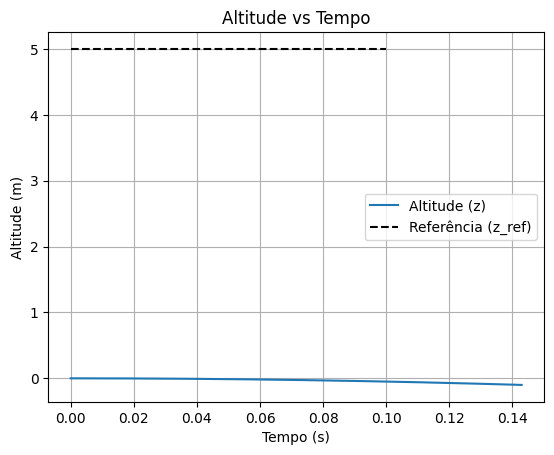

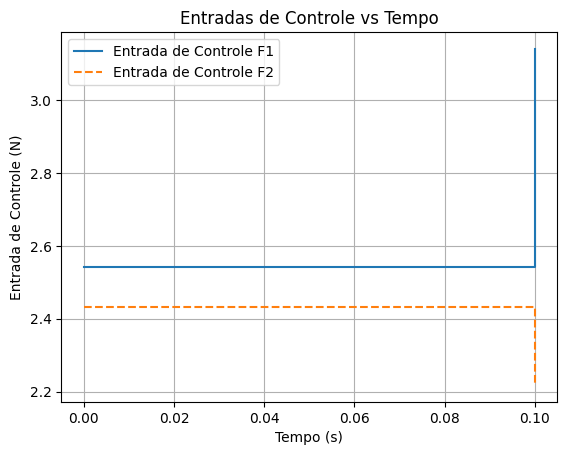

In [91]:
# Controlabilidade e Observabilidade
print("Rank da Matriz de Controlabilidade:", rank_ctrb)
if rank_ctrb == n:
    print("O sistema é completamente controlável.")
else:
    print("O sistema não é completamente controlável.")

print("\nRank da Matriz de Observabilidade:", rank_obsv)
if rank_obsv == n:
    print("O sistema é completamente observável.")
else:
    print("O sistema não é completamente observável.")

# Condição para rastreamento
print("\nRank da Matriz de Rastreamento:", rank_tracking)
if rank_tracking == M_tracking.shape[0]:
    print("O sistema satisfaz a condição para rastreamento.")
else:
    print("O sistema não satisfaz a condição para rastreamento.")

# Plotando Altitude vs Tempo
plt.figure()
plt.plot(t[:k+1], x[0, :k+1], label='Altitude (z)')
plt.step(td[:kd], r[0, :kd], 'k--', where='post', label='Referência (z_ref)')
plt.title('Altitude vs Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Altitude (m)')
plt.legend()
plt.grid()

# Plotando Entradas de Controle vs Tempo
plt.figure()
plt.step(td[:kd], u[0, :kd], label='Entrada de Controle F1', where='post')
plt.step(td[:kd], u[1, :kd], '--', label='Entrada de Controle F2', where='post')
plt.title('Entradas de Controle vs Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Entrada de Controle (N)')
plt.legend()
plt.grid()

plt.show()